In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Step 1: Load the dataset
newsgroups = fetch_20newsgroups(subset='test', categories=['sci.space', 'sci.electronics'])
documents = newsgroups.data
labels = newsgroups.target
category_names = newsgroups.target_names

In [3]:
# Print out a sample of the documents
print("Sample Documents:")
for i in range(2):
    print(f"Document {i+1}:")
    print(documents[i])
    print("\n")

Sample Documents:
Document 1:
From: d9bertil@dtek.chalmers.se (Bertil Jonell)
Subject: Re: How universal are phones these days?
Organization: 'Vilse i Pannkakan'-survivors Anonymous
Lines: 13
Nntp-Posting-Host: hacket.dtek.chalmers.se

In article <1rh22eINNfce@shelley.u.washington.edu> kniha@carson.u.washington.edu (Dagmar Amtmann) writes:
>There is a wire without any jack at the end sticking out of the wall. So you
>need to connect the wires (I'm not sure if they have wall jacks in Western
>Europe - they may).

  Son of the Return of the "How much does Americans know about the rest of
the word?"-flamewar anyone?

-bertil-
--
"It can be shown that for any nutty theory, beyond-the-fringe political view or
 strange religion there exists a proponent on the Net. The proof is left as an
 exercise for your kill-file."



Document 2:
From: atae@spva.ph.ic.ac.uk (Ata Etemadi)
Subject: Re: Abyss-breathing fluids
Nntp-Posting-Host: prawn.sp.ph
Organization: Imperial College of Science, Technolog

In [4]:
# Step 2: Preprocess the Data
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

In [5]:
# Step 3: Compute Similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

In [6]:
# Print the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

Cosine Similarity Matrix:
[[1.         0.00601462 0.01177478 ... 0.00622205 0.00934679 0.01374593]
 [0.00601462 1.         0.00104838 ... 0.01702826 0.02586074 0.00417709]
 [0.01177478 0.00104838 1.         ... 0.01218985 0.01517745 0.01101025]
 ...
 [0.00622205 0.01702826 0.01218985 ... 1.         0.01322786 0.04761187]
 [0.00934679 0.02586074 0.01517745 ... 0.01322786 1.         0.00969551]
 [0.01374593 0.00417709 0.01101025 ... 0.04761187 0.00969551 1.        ]]


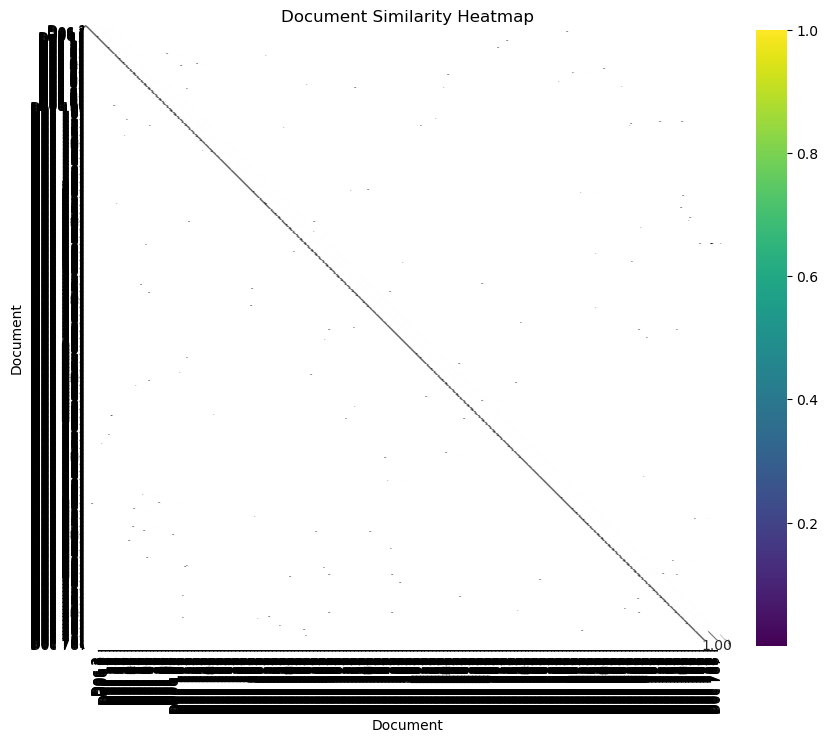

In [7]:
# Step 4: Visualize the Similarity Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis', annot=True, fmt='.2f', 
            xticklabels=[f"Doc {i+1}" for i in range(len(documents))],
            yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title("Document Similarity Heatmap")
plt.xlabel("Document")
plt.ylabel("Document")
plt.show()